### カリキュラム - 【AIコース】 Keras入門 モデル構築/学習

In [1]:
import pandas as pd
import numpy as np

# 乱数の固定
seed = 7
np.random.seed(seed)
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
df_iris = pd.read_csv(url, header = None)

In [2]:
df_iris.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df_iris.columns = [
    "sepal length in cm",
    "sepal width in cm",
    "petal length in cm",
    "petal width in cm",
    "class"
]

In [4]:
# 元々のdataframeのshapeを確認
print("df shape: ", df_iris.shape)

df shape:  (150, 5)


In [5]:
# split input X, label y
X = df_iris.values[:, 0: 4].astype(float)
y = df_iris.values[:, 4]

# shapeの確認
print("X shape: ", X.shape)
print("y shape: ", y.shape)

X shape:  (150, 4)
y shape:  (150,)


In [6]:
# 前処理 preprocessing - 文字列データを整数に変換
# 変換前にyからランダムに１０個取り出して、値を確認する
print(np.random.choice(y, 10))

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor'
 'Iris-virginica' 'Iris-setosa' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-virginica' 'Iris-setosa']


In [7]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)
# 整数になっていることを確認
print(np.random.choice(y_encoded, 10))

[2 1 2 2 0 1 1 0 0 0]


In [8]:
# one-hot表記変換
from keras.utils import np_utils
y_dummy = np_utils.to_categorical(y_encoded)
y_dummy

Using TensorFlow backend.
/Users/yasu/.pyenv/versions/anaconda3-4.3.0/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


array([[ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.

In [9]:
# split train, test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_dummy)

In [10]:
# Model selection
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD

# Define model
model = Sequential()
model.add(Dense(8, input_dim = 4, activation = "sigmoid"))
model.add(Dense(3, activation = "softmax"))

In [12]:
# Define optimizatio method
sgd = SGD(lr = 0.1)

# Compile model
model.compile(
    loss = "categorical_crossentropy",
    # 2値分類 -> binary_crossentropy
    optimizer = sgd,
    metrics = ["accuracy"],
)

In [13]:
# Learning
model.fit(X_train, y_train, epochs = 200, batch_size = 10)

Epoch 1/200
112/112 [==============================] - 0s 3ms/step - loss: 1.0027 - acc: 0.6786
Epoch 2/200
112/112 [==============================] - 0s 120us/step - loss: 0.9289 - acc: 0.7232
Epoch 3/200
112/112 [==============================] - 0s 146us/step - loss: 0.8378 - acc: 0.6964
Epoch 4/200
112/112 [==============================] - 0s 145us/step - loss: 0.7557 - acc: 0.7500
Epoch 5/200
112/112 [==============================] - 0s 153us/step - loss: 0.6919 - acc: 0.7411
Epoch 6/200
112/112 [==============================] - 0s 124us/step - loss: 0.6421 - acc: 0.7321

In [14]:
# Evaluation
scores = model.evaluate(X_test, y_test, verbose = 0)
for m, s in zip(model.metrics_names, scores):
    print(m, s)

loss 0.0777272246778
acc 0.973684210526


In [15]:
# Prediction
model.predict(X_test[0].reshape(1, -1))

array([[  2.91622782e-05,   3.99150401e-02,   9.60055828e-01]], dtype=float32)

In [17]:
# Label
# Decode one-hot -> integers
print("label: ", y_test[0].argmax())

# Prediction
pred = model.predict_classes(X_test[0].reshape(1, -1), verbose = 0)
print("prediction: ", pred[0])

label:  2
prediction:  2


In [19]:
# Saving model and weights
# make directory for save
import os

# Directory path for saving model
RESULT_PATH = "./result"

# Create path if none
if not os.path.exists(RESULT_PATH):
    os.mkdir(RESULT_PATH)

# Save model to JSON
model_json = model.to_json()  # Directory like json format
model_path = os.path.join(RESULT_PATH, "model.json")
with open(model_path, "w") as json_file:
    json_file.write(model_json)

In [21]:
# Save weights to HDF5
weights_path = os.path.join(RESULT_PATH, "weights.hdf5")
model.save_weights(weights_path)

In [23]:
# Loading model and weights
from keras.models import model_from_json

# Load model
json_file = open(model_path, "r")
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)

In [24]:
# Load weights
loaded_model.load_weights(weights_path)

In [25]:
# Compile again before prediction
loaded_model.compile(
    loss = "categorical_crossentropy",
    # 2値分類 -> binary_crossentropy
    optimizer = sgd,
    metrics = ["accuracy"],
)

# Evaluatio again
scores = model.evaluate(X_test, y_test, verbose = 0)
scores_loaded = loaded_model.evaluate(X_test, y_test, verbose = 0)
df_scores = pd.DataFrame([scores, scores_loaded], 
                         index = ["former", "loaded"],
                         columns = model.metrics_names)

from IPython.display import display
display(df_scores)

,loss,acc
former,0.077727,0.973684
loaded,0.077727,0.973684


In [26]:
# Visualize weigts rows and columns
W = model.get_weights()

# 1st layer
W[0]

array([[ 0.41304186,  1.25589383, -1.47026718, -0.90018409,  0.54027015,
         0.63793892, -0.23332889, -0.45259854],
       [ 1.45293581,  0.70490295, -1.37284315, -0.40484419,  0.41801482,
         1.87869775, -0.23327316, -1.4161967 ],
       [-1.13053834, -2.09604073,  2.24902177,  1.72117317,  0.71227717,
        -1.68166637, -0.55352122,  2.33941317],
       [-1.66224706, -0.81489873,  2.31009316,  0.39616564,  0.53548062,
        -1.73600602, -0.43469402,  0.94493991]], dtype=float32)

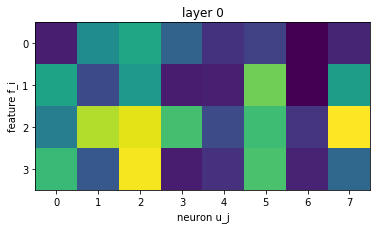

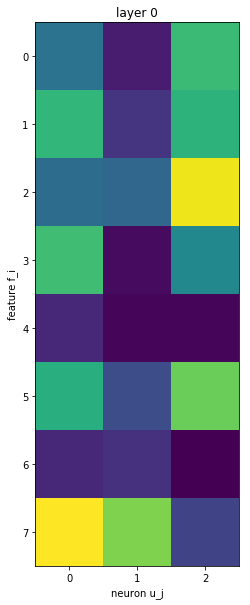

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline

# 層ごとに重みを重み行列を持つlist
ls_W = model.get_weights()

for l, W in enumerate(ls_W):
    # 可視化のために各成分の大きさ（絶対値）をとる
    W = np.abs(W)
    
    # Skipp bias
    if len(W.shape) == 1:
        continue
    
    plt.figure(figsize = (6, 10))
    plt.imshow(W)
    i, j = W.shape
    plt.title("layer {}".format(1//2))
    plt.xticks(range(j))
    plt.xlabel("neuron u_j")
    plt.yticks(range(i))
    plt.ylabel("feature f_i")

#### 小課題
##### ・cross entropyとは
参考文献:  
http://cookie-box.hatenablog.com/entry/2017/05/07/121607
###### 何か
ある確率分布に最適化された方式で別の確率分布をエンコードしたときの平均ビット長  
###### どうしてMSEのかわりに使うのか
交差検証の方が二乗誤差よりも誤差が大きいときの学習が速いため  

##### ・softmaxとは
参考文献:  
https://mathtrain.jp/softmax  
http://taka74k4.hatenablog.com/entry/2017/07/31/192428
###### 何か
[補足] xを入力、yを出力とする 
n次元の実数ベクトルを受け取り、全出力層のネイピア数の和で割ったn次元実数ベクトルのネイピア数を返す関数 
式: yi = ei / (e1 + ... + en)  
softmax関数の性質:   
(i)   0 < yi < 1  
(ii)  y1 + ... + yn = 1  
(iii) xの各成分の中でxiがダントツで大きいとき、yiはほぼ１でyの他の成分はほぼ０  
つまり、softmaxは確率を返すが、総和は１となる  

###### 出力ベクトルが同じく多次元となるelement-wise sigmoidとの違い
element-wise sigmoidは答えと出力の誤差が大きいときに学習が速い。  
一方、softmaxは１と出力の誤差が大きいときに学習が速い。
###### どのようなtaskに使うのか?
softmaxは確率を返すため、その確率が予測の判断基準となるため、最後の出力に使う  